In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("PlacesV2.csv")

In [3]:
selected_cities = ["Alexandria", "Cairo", "Giza", "Aswan", "Luxor"]

In [4]:
df_filtered = df[df["City"].isin(selected_cities)]

In [5]:
df_filtered.count()

place_id            179
Name                179
Category            179
Google Maps Link    179
City                179
Rate                179
Total Rates         179
Description         179
Tourism Type        179
city_id             179
Latitude            179
Longitude           179
dtype: int64

In [6]:
len(df_filtered['Category'].unique())

25

In [7]:
df_filtered['Category'].unique()

array(['Theme Park', 'Water Park', 'Zoo', 'Tower', 'Shopping', 'Garden',
       'Natural Reserve', 'Island', 'Aquarium', 'Mosque', 'Church',
       'Monastery', 'Synagogue', 'Museum', 'Hot Spring',
       'Healing Oases & Sand Therapy', 'Rehabilitation & Wellness Center',
       'Historical Site', 'Temple', 'Fortress', 'Library', 'Palace',
       'Tomb', 'Theater', 'Cultural Center'], dtype=object)

In [8]:
len(df_filtered['Tourism Type'].unique())

5

In [9]:
df_filtered['Tourism Type'].unique()

array(['Entertainment and Modern Attractions', 'Natural Attractions',
       'Religious and Spiritual Attractions', 'Medical Attractions',
       'Cultural and Historical Attractions'], dtype=object)

In [10]:
df_filtered.columns

Index(['place_id', 'Name', 'Category', 'Google Maps Link', 'City', 'Rate',
       'Total Rates', 'Description', 'Tourism Type', 'city_id', 'Latitude',
       'Longitude'],
      dtype='object')

In [11]:
df_filtered['Rate'] = df_filtered['Rate'].astype(float)  

C:\Users\hassa\AppData\Local\Temp\ipykernel_13688\4167288688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Rate'] = df_filtered['Rate'].astype(float)


In [12]:
df_filtered['Total Rates'] = df_filtered['Total Rates'].astype(str).str.replace(',', '').astype(float)


C:\Users\hassa\AppData\Local\Temp\ipykernel_13688\1743806416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total Rates'] = df_filtered['Total Rates'].astype(str).str.replace(',', '').astype(float)


In [13]:
df_filtered['Total Rates'].dtype

dtype('float64')

In [14]:
df_filtered['Popularity'] = df_filtered['Rate'] * df_filtered['Total Rates']

C:\Users\hassa\AppData\Local\Temp\ipykernel_13688\4257033064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Popularity'] = df_filtered['Rate'] * df_filtered['Total Rates']


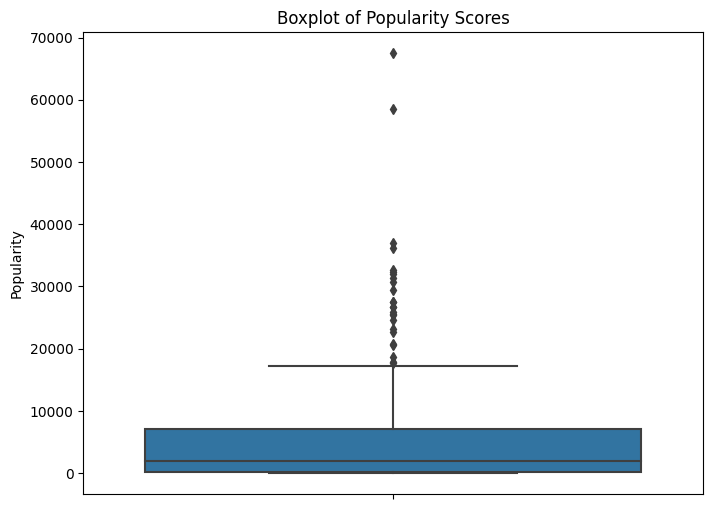

In [15]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, y='Total Rates')

# Add title and labels
plt.title('Boxplot of Popularity Scores')
plt.ylabel('Popularity')

# Show plot
plt.show()


In [16]:
def categorize_popularity(x):
    if x < 10000:
        return 'Low'
    elif x > 10000 and x < 30000:
        return 'Medium'
    else:
        return 'High'
    

In [17]:
df_filtered['popularity_category'] = df_filtered['Popularity'].apply(categorize_popularity)


C:\Users\hassa\AppData\Local\Temp\ipykernel_13688\2956548520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['popularity_category'] = df_filtered['Popularity'].apply(categorize_popularity)


In [18]:
df_filtered[df_filtered['popularity_category']=='Low'].head(2)

,place_id,Name,Category,Google Maps Link,City,Rate,Total Rates,Description,Tourism Type,city_id,Latitude,Longitude,Popularity,popularity_category
1,2,Magic Land,Theme Park,https://maps.app.goo.gl/pagQ93SuUb5smLFT7,Giza,4.1,100.0,Magic Land is a fantastic theme park that offe...,Entertainment and Modern Attractions,0,29.963340,31.024918,410.0,Low
2,3,Sindbad Amusement Park,Theme Park,https://maps.app.goo.gl/Y2oiuubB3HZFshM69,Cairo,3.1,67.0,Sindbad Amusement Park is a fantastic destinat...,Entertainment and Modern Attractions,1,30.119268,31.368494,207.7,Low


In [19]:
df_filtered['city_id'].unique()

array([ 0,  1,  5, 17, 18], dtype=int64)

In [20]:
# budget_mapping = {
#     ('Theme Park', 'Entertainment and Modern Attractions'): ['High', 'Medium'],
#     ('Water Park', 'Entertainment and Modern Attractions'): ['High', 'Medium'],
#     ('Zoo', 'Entertainment and Modern Attractions'): ['Low', 'Medium'],
#     ('Tower', 'Entertainment and Modern Attractions'): ['Medium'],
#     ('Shopping', 'Entertainment and Modern Attractions'): ['Medium', 'High'],
#     ('Garden', 'Natural Attractions'): ['Low'],
#     ('Natural Reserve', 'Natural Attractions'): ['Medium', 'High'],
#     ('Island', 'Natural Attractions'): ['High'],
#     ('Aquarium', 'Natural Attractions'): ['Medium', 'Low'],
#     ('Mosque', 'Religious and Spiritual Attractions'): ['Low'],
#     ('Church', 'Religious and Spiritual Attractions'): ['Low'],
#     ('Monastery', 'Religious and Spiritual Attractions'): ['Low'],
#     ('Synagogue', 'Religious and Spiritual Attractions'): ['Low'],
#     ('Museum', 'Cultural and Historical Attractions'): ['Medium'],
#     ('Hot Spring', 'Medical Attractions'): ['Medium', 'High'],
#     ('Healing Oases & Sand Therapy', 'Medical Attractions'): ['Low', 'Medium'],
#     ('Rehabilitation & Wellness Center', 'Medical Attractions'): ['Low', 'Medium'],
#     ('Historical Site', 'Cultural and Historical Attractions'): ['Medium', 'High'],
#     ('Temple', 'Cultural and Historical Attractions'): ['Medium'],
#     ('Fortress', 'Cultural and Historical Attractions'): ['High'],
#     ('Library', 'Cultural and Historical Attractions'): ['Low'],
#     ('Palace', 'Cultural and Historical Attractions'): ['High'],
#     ('Tomb', 'Cultural and Historical Attractions'): ['Low'],
#     ('Theater', 'Entertainment and Modern Attractions'): ['Medium'],
#     ('Cultural Center', 'Cultural and Historical Attractions'): ['Medium', 'High']
# }

In [21]:
# def assign_budget(row):
#     return budget_mapping.get((row['Category'], row['Tourism Type']), ['Medium'])  # Default to 'Medium' if not found

In [22]:
# df_filtered['budget'] = df_filtered.apply(assign_budget, axis=1)

In [23]:
df_filtered.columns

Index(['place_id', 'Name', 'Category', 'Google Maps Link', 'City', 'Rate',
       'Total Rates', 'Description', 'Tourism Type', 'city_id', 'Latitude',
       'Longitude', 'Popularity', 'popularity_category'],
      dtype='object')

In [24]:
df_filtered = df_filtered.drop(columns=['Google Maps Link', 'Rate','Total Rates','Popularity'])


# Display the DataFrame after removing columns
print(df)


     place_id                              Name         Category  \
0           1                        Dream Park       Theme Park   
1           2                        Magic Land       Theme Park   
2           3            Sindbad Amusement Park       Theme Park   
3           4                          Zed Park       Theme Park   
4           5                       Family Park       Theme Park   
..        ...                               ...              ...   
315     20000         Oyun Musa (Moses Springs)       Hot Spring   
316     20001                 Al-Ghareeb Mosque           Mosque   
317     20002  Suez Corniche & Ahl Suez Walkway            Beach   
318     20003                    Meidum Pyramid  Historical Site   
319     20004   Museum of Tal Basta Antiquities           Museum   

                              Google Maps Link       City  Rate Total Rates  \
0    https://maps.app.goo.gl/HKuc4iMGP3xxkuzT7       Giza   4.2      25,565   
1    https://maps.app.goo

In [25]:
# with_who_mapping = {
#     ('Theme Park', 'Entertainment and Modern Attractions'): ['Friends', 'Family'],
#     ('Water Park', 'Entertainment and Modern Attractions'): ['Friends', 'Family'],
#     ('Zoo', 'Natural Attractions'): ['Family', 'Solo'],
#     ('Tower', 'Entertainment and Modern Attractions'): ['Couple', 'Solo'],
#     ('Shopping', 'Entertainment and Modern Attractions'): ['Friends', 'Couple'],
#     ('Garden', 'Natural Attractions'): ['Couple', 'Family'],
#     ('Natural Reserve', 'Natural Attractions'): ['Solo', 'Family'],
#     ('Island', 'Natural Attractions'): ['Couple', 'Family'],
#     ('Aquarium', 'Natural Attractions'): ['Friends', 'Family'],
#     ('Mosque', 'Religious and Spiritual Attractions'): ['Solo', 'Family'],
#     ('Church', 'Religious and Spiritual Attractions'): ['Couple', 'Family'],
#     ('Monastery', 'Religious and Spiritual Attractions'): ['Solo'],
#     ('Synagogue', 'Religious and Spiritual Attractions'): ['Solo'],
#     ('Museum', 'Cultural and Historical Attractions'): ['Solo', 'Couple'],
#     ('Hot Spring', 'Medical Attractions'): ['Couple', 'Solo'],
#     ('Healing Oases & Sand Therapy', 'Medical Attractions'): ['Solo', 'Couple'],
#     ('Rehabilitation & Wellness Center', 'Medical Attractions'): ['Solo'],
#     ('Historical Site', 'Cultural and Historical Attractions'): ['Solo', 'Family', 'Couple'],
#     ('Temple', 'Cultural and Historical Attractions'): ['Solo', 'Couple'],
#     ('Fortress', 'Cultural and Historical Attractions'): ['Solo', 'Family'],
#     ('Library', 'Cultural and Historical Attractions'): ['Solo'],
#     ('Palace', 'Cultural and Historical Attractions'): ['Couple', 'Solo'],
#     ('Tomb', 'Cultural and Historical Attractions'): ['Solo'],
#     ('Theater', 'Entertainment and Modern Attractions'): ['Friends', 'Couple'],
#     ('Cultural Center', 'Cultural and Historical Attractions'): ['Solo', 'Couple']
# }

In [26]:
# def assign_with_who(row):
#     return with_who_mapping.get((row['Category'], row['Tourism Type']), ['Solo'])  # Default to ['Solo']

# # Apply the function to the DataFrame
# df_filtered['with_who'] = df_filtered.apply(assign_with_who, axis=1)

In [27]:
category_mapping = {
    "Theme Park": {
        "budget": ["medium", "high"],
        "with_who": ["Family", "Friends", "Couple"]
    },
    "Water Park": {
        "budget": ["medium", "high"],
        "with_who": ["Family", "Friends"]
    },
    "Zoo": {
        "budget": ["medium"],
        "with_who": ["Family", "Friends"]
    },
    "Tower": {
        "budget": ["medium"],
        "with_who": ["Solo", "Couple", "Friends"]
    },
    "Shopping": {
        "budget": ["low", "medium", "high"],
        "with_who": ["Solo", "Friends", "Couple", "Family"]
    },
    "Garden": {
        "budget": ["low", "medium"],
        "with_who": ["Solo", "Family", "Couple"]
    },
    "Natural Reserve": {
        "budget": ["low", "medium"],
        "with_who": ["Solo", "Friends", "Family"]
    },
    "Island": {
        "budget": ["medium", "high"],
        "with_who": ["Couple", "Friends", "Solo"]
    },
    "Aquarium": {
        "budget": ["medium"],
        "with_who": ["Family", "Friends"]
    },
    "Mosque": {
        "budget": ["low"],
        "with_who": ["Solo", "Family"]
    },
    "Church": {
        "budget": ["low"],
        "with_who": ["Solo", "Family"]
    },
    "Monastery": {
        "budget": ["low"],
        "with_who": ["Solo", "Family"]
    },
    "Synagogue": {
        "budget": ["low"],
        "with_who": ["Solo"]
    },
    "Museum": {
        "budget": ["low", "medium"],
        "with_who": ["Solo", "Couple", "Friends"]
    },
    "Hot Spring": {
        "budget": ["medium", "high"],
        "with_who": ["Solo", "Couple"]
    },
    "Healing Oases & Sand Therapy": {
        "budget": ["high"],
        "with_who": ["Solo", "Couple"]
    },
    "Rehabilitation & Wellness Center": {
        "budget": ["high"],
        "with_who": ["Solo", "Couple"]
    },
    "Historical Site": {
        "budget": ["low", "medium"],
        "with_who": ["Solo", "Couple", "Friends"]
    },
    "Temple": {
        "budget": ["medium"],
        "with_who": ["Solo", "Friends", "Couple"]
    },
    "Fortress": {
        "budget": ["low", "medium"],
        "with_who": ["Solo", "Friends"]
    },
    "Library": {
        "budget": ["low"],
        "with_who": ["Solo", "Couple"]
    },
    "Palace": {
        "budget": ["medium"],
        "with_who": ["Couple", "Family"]
    },
    "Tomb": {
        "budget": ["low", "medium"],
        "with_who": ["Solo", "Friends"]
    },
    "Theater": {
        "budget": ["medium"],
        "with_who": ["Couple", "Friends"]
    },
    "Cultural Center": {
        "budget": ["low", "medium"],
        "with_who": ["Solo", "Couple", "Friends"]
    }
}


In [28]:
df_filtered.columns

Index(['place_id', 'Name', 'Category', 'City', 'Description', 'Tourism Type',
       'city_id', 'Latitude', 'Longitude', 'popularity_category'],
      dtype='object')

In [29]:
# Create two new columns based on the mapping
df_filtered["budget"] = df_filtered["Category"].map(lambda x: ", ".join(category_mapping[x]["budget"]))
df_filtered["with_who"] = df_filtered["Category"].map(lambda x: ", ".join(category_mapping[x]["with_who"]))


In [30]:
df_filtered.columns

Index(['place_id', 'Name', 'Category', 'City', 'Description', 'Tourism Type',
       'city_id', 'Latitude', 'Longitude', 'popularity_category', 'budget',
       'with_who'],
      dtype='object')

In [31]:
# Rename the columns to match your desired naming convention
df_latest = df_filtered.rename(columns={
    'Name': 'name',
    'City': 'city',
    'Description': 'description',
    'Category': 'category',
    'Tourism Type': 'tourism_type',
    'Latitude': 'latitude',
    'Longitude': 'longitude'
})

# Reorder the columns
df_filtered = df_latest[[
    'place_id', 'name', 'city', 'city_id', 'description', 'category', 
    'tourism_type', 'popularity_category', 'budget', 'with_who', 
    'latitude', 'longitude'
]]


In [33]:
df_filtered.to_csv('places.csv', index=False)


In [34]:
# Group by the 'city' column and export each group to a separate CSV
for city, group in df_filtered.groupby('city'):
    # Sanitize the city name to be file-safe (remove slashes, spaces, etc.)
    safe_city = city.replace(" ", "_").replace("/", "_")
    filename = f"{safe_city.lower()}_places.csv"
    group.to_csv(filename, index=False)


In [4]:
import pandas as pd
df = pd.read_csv("ml.csv")
df.shape


(96, 3)

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(55, 2)

In [7]:
df.to_csv('ml2.csv', index=False)


In [8]:
df = pd.read_csv("Itienrary Planner/Updated_Plans.csv")


In [9]:
df.shape

(60, 2)

In [12]:
df.to_csv('ml3.csv', index=False)
